In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl
%matplotlib inline
%precision 2

'%.2f'

In [2]:
#locations=['Battle Creek','Big Rapids','East Jordan','Houghton Lake','Kent City','Lake City','South Haven','Wellston']
def func(i):
	data=pd.read_excel('snowfall.xlsx',sheetname=i)#.set_index('Year')
	data.columns=['Year','Snow']
	return data

BattleCreek=func('Battle Creek')
BigRapids=func('Big Rapids')
EastJordan=func('East Jordan')
HoughtonLake=func('Houghton Lake')
KentCity=func('Kent City')
LakeCity=func('Lake City')
SouthHaven=func('South Haven')
Wellston=func('Wellston')
BigRapids.head()



,Year,Snow
0,1932,23.6
1,1933,24.1
2,1934,25.1
3,1935,33.7
4,1936,61.7


In [3]:
from scipy.stats import norm, mstats


def mk_test(x, alpha = 0.05):  
    """   
    Input:
        x:   a vector of data
        alpha: significance level (0.05 default)

    Output:
        trend: tells the trend (increasing, decreasing or no trend)
        h: True (if trend is present) or False (if trend is absence)
        p: p value of the significance test
        z: normalized test statistics 

    Examples
    --------
      >>> x = np.random.rand(100)
      >>> trend,h,p,z = mk_test(x,0.05) 
    """
    n = len(x)

    # calculate S 
    s = 0
    for k in range(n-1):
        for j in range(k+1,n):
            s += np.sign(x[j] - x[k])

    # calculate the unique data
    unique_x = np.unique(x)
    g = len(unique_x)

    # calculate the var(s)
    if n == g: # there is no tie
        var_s = (n*(n-1)*(2*n+5))/18
    else: # there are some ties in data
        tp = np.zeros(unique_x.shape)
        for i in range(len(unique_x)):
            tp[i] = sum(unique_x[i] == x)
        var_s = (n*(n-1)*(2*n+5) + np.sum(tp*(tp-1)*(2*tp+5)))/18

    if s>0:
        z = (s - 1)/np.sqrt(var_s)
    elif s == 0:
            z = 0
    elif s<0:
        z = (s + 1)/np.sqrt(var_s)

    # calculate the p_value
    p = 2*(1-norm.cdf(abs(z))) # two tail test
    h = abs(z) > norm.ppf(1-alpha/2) 

    if (z<0) and h:
        trend = 'decreasing'
    elif (z>0) and h:
        trend = 'increasing'
    else:
        trend = 'no trend'

    return trend, h, p, z


http://www.statsmodels.org/stable/index.html

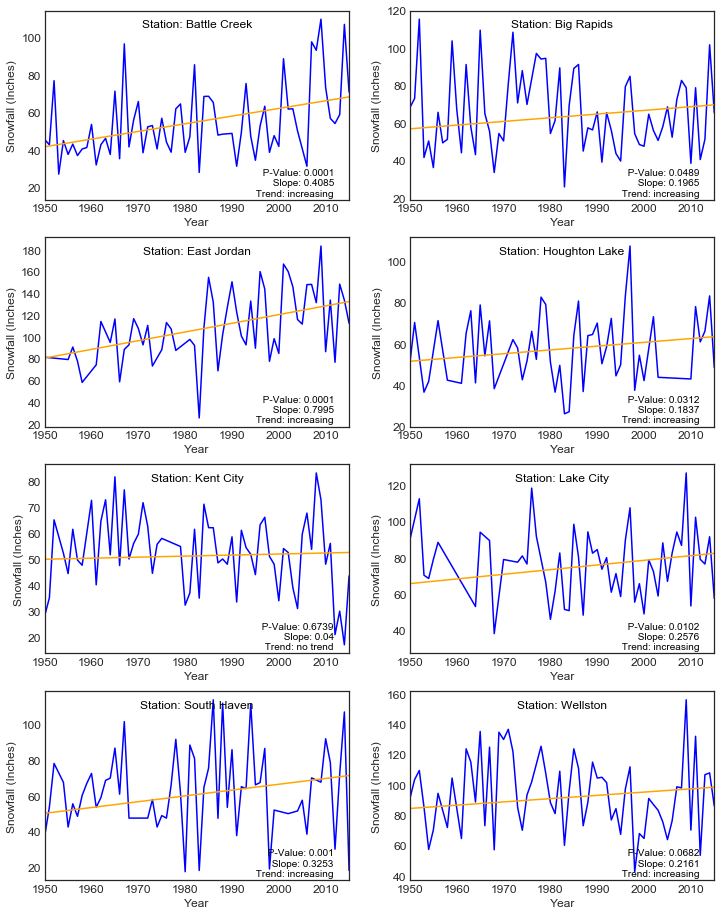

In [11]:
import statsmodels.formula.api as smf
import matplotlib as mpl

import seaborn
seaborn.set_style("white")
#mpl.rc('font',family='Times New Roman')

stations=[BattleCreek,BigRapids,EastJordan,HoughtonLake,KentCity,LakeCity,SouthHaven,Wellston]
locations=['Battle Creek','Big Rapids','East Jordan','Houghton Lake','Kent City','Lake City','South Haven','Wellston']
tren=[]
P_value=[]
slope=[]
Intercept=[]
fig=plt.figure(1,(12,16))
for i in range(len(locations)):
    trend,h,p,z=mk_test(stations[i].ix[:,1].tolist(), alpha = 0.1)
    if round(p,4)==0:
        p=0.0001
    lm = smf.ols(formula='Snow~Year',data=stations[i]).fit()
    c,m=lm.params
    slope.append(round(m,4))
    Intercept.append(round(c,4))
    tren.append(trend)
    P_value.append(round(p,4))
    
    # plots
    ax=fig.add_subplot(4,2,i+1)
    #ax.set_title('Station Name: {}'.format(locations[i]))
    ax.set_ylabel('Snowfall (Inches)',fontsize=12)
    ax.set_xlabel('Year',fontsize=12)
    preds = lm.predict(stations[i]['Year'])
    stations[i]['Trend']=preds
    #stations[i]=stations[i].set_index('Year')
    stations[i].plot('Year','Snow',ax=ax,legend=False,fontsize=12,xlim=1950,color='blue')
    stations[i].plot('Year','Trend',color='orange',ax=ax,legend=False,fontsize=12,xlim=1950)

    ax.text(0.95, 0.01,' P-Value: {}\n Slope: {}\n Trend: {}'.format(round(p,4),round(m,4),trend),fontsize=10,color='black', ha='right', va='bottom', transform=ax.transAxes)
    
    ax.text(0.5, 0.9,'Station: {}'.format(locations[i]), ha='center', va='bottom',fontsize=12,color='Black', transform=ax.transAxes)
  
 
    

   
    
    



In [12]:
table=pd.DataFrame({'P_value':P_value,'Trend':tren,'Slope':slope},index=locations)
table.columns.name='Stations'
table.to_excel('table.xlsx')

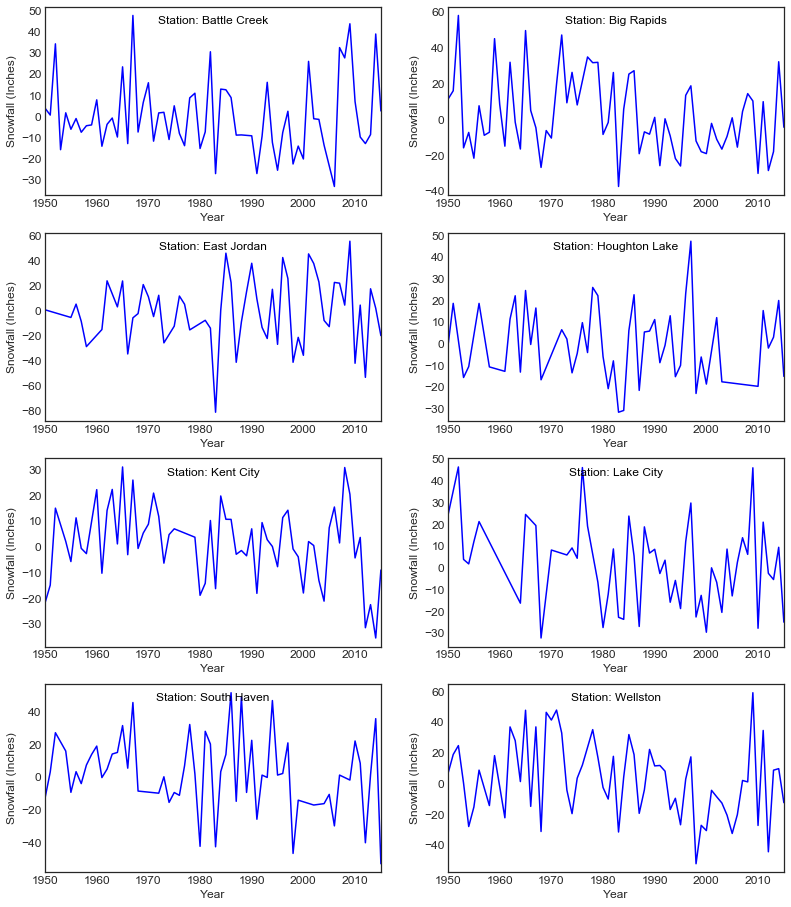

In [14]:
fig=plt.figure(1,(13.24,15.92))
for i in range(len(locations)):
    trend,h,p,z=mk_test(stations[i].ix[:,1].tolist(), alpha = 0.1)
    lm = smf.ols(formula='Snow~Year',data=stations[i]).fit()
    c,m=lm.params
    
    # plots
    ax=fig.add_subplot(4,2,i+1)
    #ax.set_title('Station Name: {}'.format(locations[i]))
    ax.set_ylabel('Snowfall (Inches)',fontsize=12)
    ax.set_xlabel('Year',fontsize=12)
    preds = lm.predict(stations[i]['Year'])
    stations[i]['Trend']=preds
    stations[i]['Detrend']=stations[i]['Snow']-stations[i]['Trend']
    #stations[i]=stations[i].set_index('Year')
    #stations[i].plot('Year','Snow',ax=ax,legend=True,fontsize=12,xlim=1950)
    stations[i].plot('Year','Detrend',color='blue',ax=ax,legend=False,fontsize=12,xlim=1950)
    ax.text(0.5, 0.9,'Station: {}'.format(locations[i]), ha='center', va='bottom',fontsize=12,color='black', transform=ax.transAxes)
